In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

import sklearn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler



2024-12-13 18:13:09.688671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# def train_using_gini(X_train, y_train, depth=3):
#     clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=depth, min_samples_leaf=5)
#     clf_gini.fit(X_train, y_train)
#     return clf_gini

# def train_using_entropy(X_train, y_train, depth=3):
#     clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=depth, min_samples_leaf=5)
#     clf_entropy.fit(X_train, y_train)
#     return clf_entropy

# def calc_accuracy(y_test, y_pred, class_names):
#     cm = confusion_matrix(y_test, y_pred)
    
#     # Create a DataFrame for the confusion matrix
#     df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    
#     # Plot the confusion matrix
#     plt.figure(figsize=(8, 6))
#     sn.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 14})
#     plt.xlabel("Predicted Labels")
#     plt.ylabel("True Labels")
#     plt.title("Confusion Matrix")
#     plt.show()
    
#     # Print accuracy and classification report
#     print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
#     print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# def cross_val_decision_tree(X, Y, splits, kf_splits=3, depth=10):
#     class_names = ['Healthy', 'Disease']  # Modify this to represent your actual class labels
#     fold_results = []

#     # Iterate over the specified training splits
#     for split in splits:
#         print(f"\nRunning Cross-Validation with Training Split: {split:.0%}")
#         test_size = 1 - split  # Compute test size from the training split

#         for fold in range(kf_splits):
#             print(f"\nFold {fold + 1}")

#             # Split the data into training and testing sets according to the split size
#             X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, shuffle=True, random_state=42)


#             # Train the model using Gini criterion (you can switch to entropy by calling train_using_entropy)
#             clf_gini = train_using_gini(X_train, y_train, depth)

#             # Make predictions
#             y_pred = clf_gini.predict(X_test)

#             # Calculate accuracy
#             accuracy = accuracy_score(y_test, y_pred)
#             fold_results.append(accuracy)

#             print(f"Accuracy for Fold {fold + 1}: {accuracy:.4f}")

#             # Calculate and plot confusion matrix
#             calc_accuracy(y_test, y_pred, class_names)

#         # Summary of results for this training split
#         print(f"\nAverage Accuracy for Training Split {split:.0%}: {np.mean(fold_results):.4f}")



In [4]:
def train_using_gini(X_train, y_train, depth=10):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    return clf

def calc_accuracy(y_test, y_pred, class_names):
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Plot Confusion Matrix
    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    plt.figure(figsize=(8, 6))
    sn.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.title("Confusion Matrix")
    plt.show()

def cross_val_decision_tree(X, Y, kf_splits=3, depth=10):
    class_names = ['Healthy', 'Disease']  # Modify this to represent your actual class labels
    fold_results = []


    # Initialize K-Fold
    kf = KFold(n_splits=kf_splits, shuffle=True, random_state=42)

    # Iterate over the splits generated by KFold
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        print(f"\nFold {fold + 1}")

        # Split the data into training and testing sets according to the split size
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]


        # Train the model using Gini criterion
        clf_gini = train_using_gini(X_train, y_train, depth)

        # Make predictions
        y_pred = clf_gini.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        fold_results.append(accuracy)

        print(f"Accuracy for Fold {fold + 1}: {accuracy:.4f}")

        # Calculate and plot confusion matrix
        calc_accuracy(y_test, y_pred, class_names)

    # Summary of results for this training split
    print(f"\nAverage Accuracy for Training: {np.mean(fold_results):.4f}")


**Heart Dataset**

In [5]:
file_path = "heart+disease/processed.cleveland.data"
column_names = ['age', 'sex', 'chest pain type','resting blood pressure' , 'cholesteral', 'fasting blood sugar < 120', 'resting ecg', 'max heart rate', 'exercise induced angina', 'oldpeak', 'slope', 'number of vessels colored', 'thal', 'class']
heart_data = pd.read_csv(file_path, delimiter=",", header=None, names=column_names)
# Class: 0 is healathy, 1-4 is disease
for i in range(len(heart_data)):
    if heart_data['class'].iloc[i] != 0:
        heart_data.loc[i, "class"] = 1
    else:
        continue

heart_data['number of vessels colored'] = pd.to_numeric(heart_data['number of vessels colored'], errors='coerce')
heart_data['thal'] = pd.to_numeric(heart_data['thal'], errors='coerce')

heart_data.dropna(inplace=True)
shuffled_heart_data = heart_data.sample(frac=1)
shuffled_heart_data.reset_index(inplace = True, drop = True)

TargetVal = ['class']
Features = ['age', 'sex', 'chest pain type','resting blood pressure' , 'cholesteral', 'fasting blood sugar < 120', 'resting ecg', 'max heart rate', 'exercise induced angina', 'oldpeak', 'slope', 'number of vessels colored', 'thal']

X = shuffled_heart_data[Features].values
Y = shuffled_heart_data[TargetVal].values

PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)



20/80


Fold 1
Accuracy for Fold 1: 0.6000
Confusion Matrix:
[[6 4]
 [4 6]]
              precision    recall  f1-score   support

     Healthy       0.60      0.60      0.60        10
     Disease       0.60      0.60      0.60        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



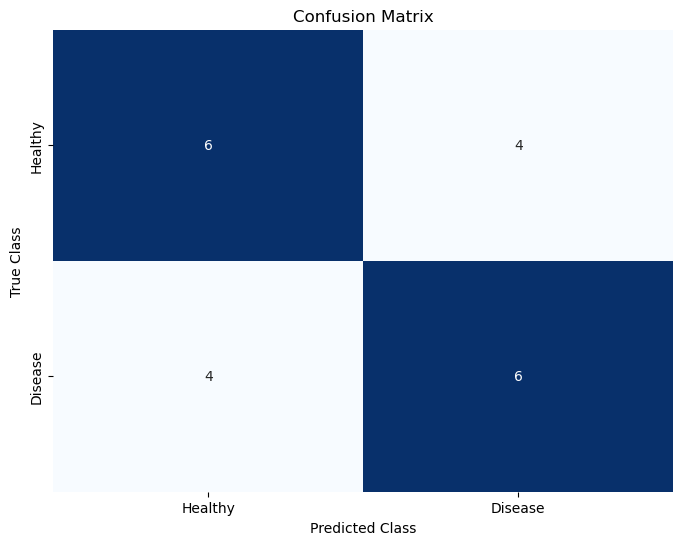


Fold 2
Accuracy for Fold 2: 0.6000
Confusion Matrix:
[[4 5]
 [3 8]]
              precision    recall  f1-score   support

     Healthy       0.57      0.44      0.50         9
     Disease       0.62      0.73      0.67        11

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



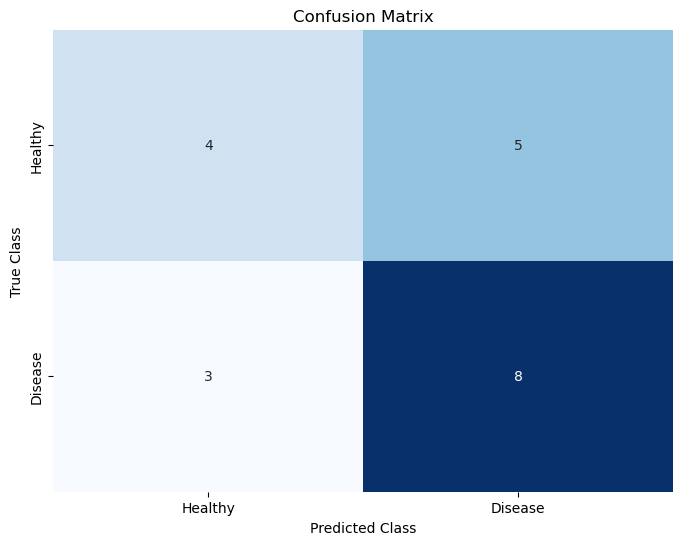


Fold 3
Accuracy for Fold 3: 0.6316
Confusion Matrix:
[[5 3]
 [4 7]]
              precision    recall  f1-score   support

     Healthy       0.56      0.62      0.59         8
     Disease       0.70      0.64      0.67        11

    accuracy                           0.63        19
   macro avg       0.63      0.63      0.63        19
weighted avg       0.64      0.63      0.63        19



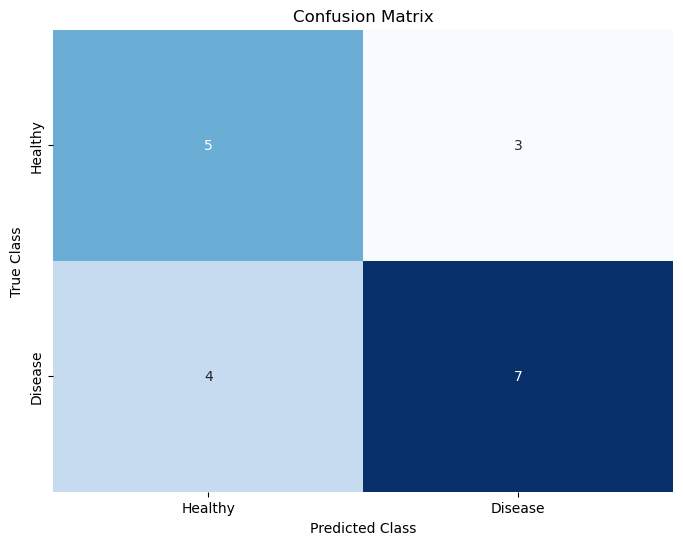


Average Accuracy for Training: 0.6105


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)
cross_val_decision_tree(X_train, y_train, depth=3)

50/50


Fold 1
Accuracy for Fold 1: 0.7980
Confusion Matrix:
[[49  4]
 [16 30]]
              precision    recall  f1-score   support

     Healthy       0.75      0.92      0.83        53
     Disease       0.88      0.65      0.75        46

    accuracy                           0.80        99
   macro avg       0.82      0.79      0.79        99
weighted avg       0.81      0.80      0.79        99



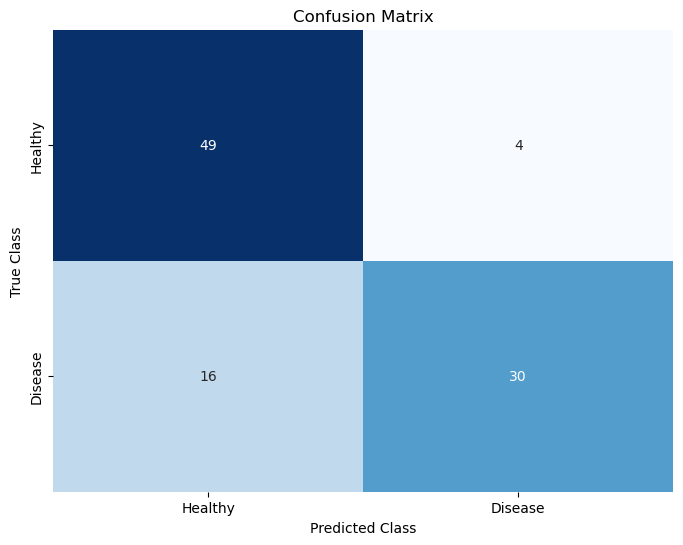


Fold 2
Accuracy for Fold 2: 0.7475
Confusion Matrix:
[[47 10]
 [15 27]]
              precision    recall  f1-score   support

     Healthy       0.76      0.82      0.79        57
     Disease       0.73      0.64      0.68        42

    accuracy                           0.75        99
   macro avg       0.74      0.73      0.74        99
weighted avg       0.75      0.75      0.74        99



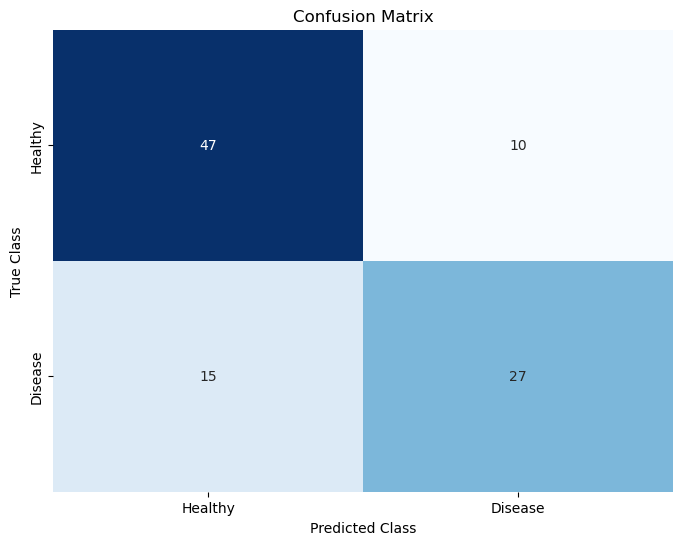


Fold 3
Accuracy for Fold 3: 0.7374
Confusion Matrix:
[[38 12]
 [14 35]]
              precision    recall  f1-score   support

     Healthy       0.73      0.76      0.75        50
     Disease       0.74      0.71      0.73        49

    accuracy                           0.74        99
   macro avg       0.74      0.74      0.74        99
weighted avg       0.74      0.74      0.74        99



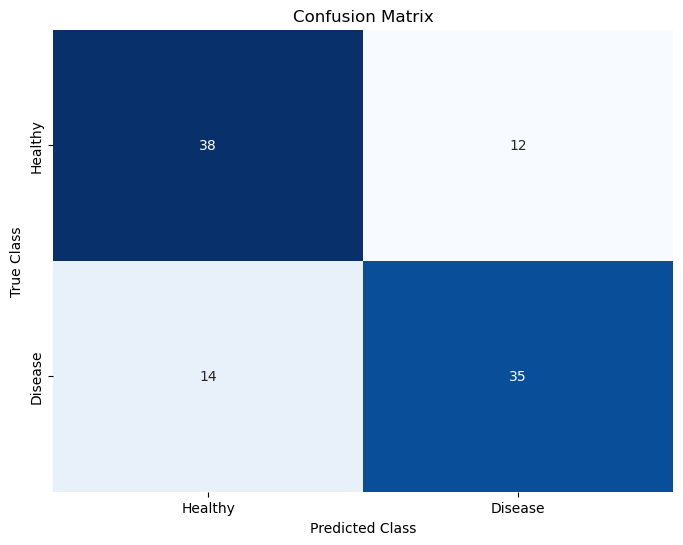


Average Accuracy for Training: 0.7609


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
cross_val_decision_tree(X, Y, depth=4)

80/20


Fold 1
Accuracy for Fold 1: 0.6962
Confusion Matrix:
[[32  8]
 [16 23]]
              precision    recall  f1-score   support

     Healthy       0.67      0.80      0.73        40
     Disease       0.74      0.59      0.66        39

    accuracy                           0.70        79
   macro avg       0.70      0.69      0.69        79
weighted avg       0.70      0.70      0.69        79



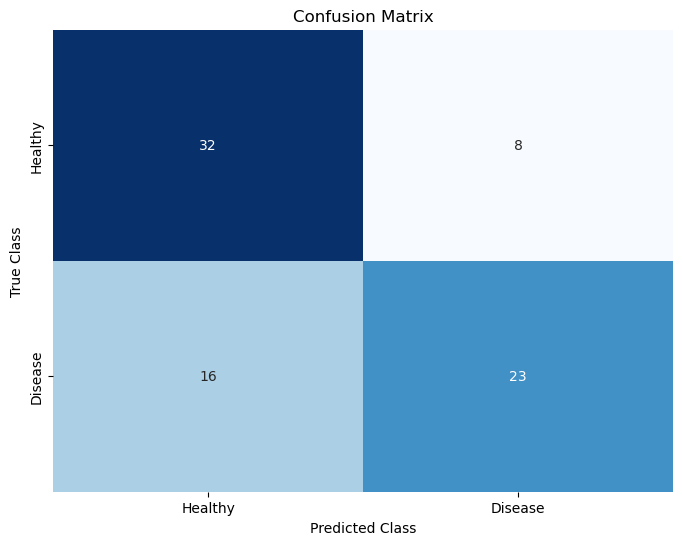


Fold 2
Accuracy for Fold 2: 0.7342
Confusion Matrix:
[[34 13]
 [ 8 24]]
              precision    recall  f1-score   support

     Healthy       0.81      0.72      0.76        47
     Disease       0.65      0.75      0.70        32

    accuracy                           0.73        79
   macro avg       0.73      0.74      0.73        79
weighted avg       0.74      0.73      0.74        79



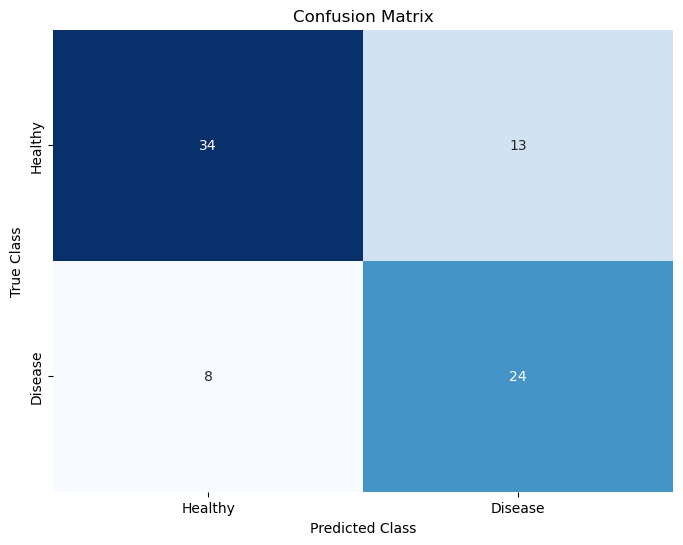


Fold 3
Accuracy for Fold 3: 0.7215
Confusion Matrix:
[[33  8]
 [14 24]]
              precision    recall  f1-score   support

     Healthy       0.70      0.80      0.75        41
     Disease       0.75      0.63      0.69        38

    accuracy                           0.72        79
   macro avg       0.73      0.72      0.72        79
weighted avg       0.73      0.72      0.72        79



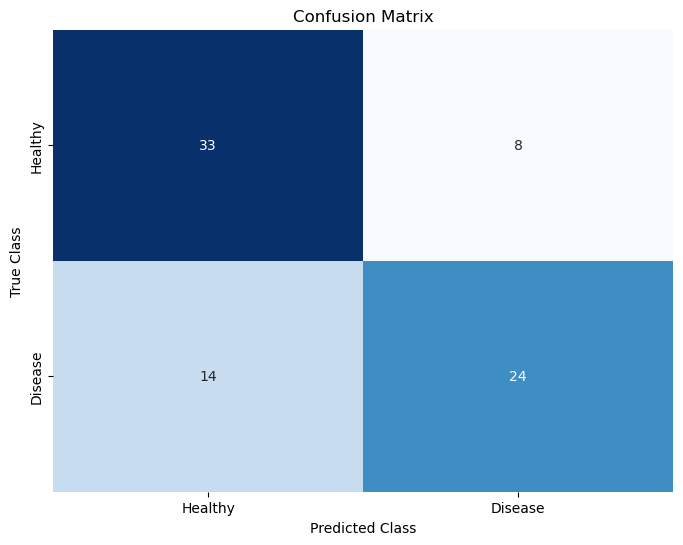


Average Accuracy for Training: 0.7173


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
cross_val_decision_tree(X_train, y_train, depth=5)

**Parkinsons Dataset**

In [9]:
file_path = "parkinsons/parkinsons.data"
parkin_data = pd.read_csv(file_path, delimiter=",", header=0)
parkin_data.drop(columns=parkin_data.columns[0], inplace=True)

parkin_data.dropna(inplace=True)

correlation_matrix = parkin_data.corr()

upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
parkin_data_reduced = parkin_data.drop(columns=to_drop)
shuffled_park_data = parkin_data_reduced.sample(frac=1)
shuffled_park_data.reset_index(inplace = True, drop = True)

TargetVal = ['status']
feat_list = list(parkin_data_reduced.columns)
feat_list.remove('status')
Features = feat_list
X = shuffled_park_data[Features].values
Y = shuffled_park_data[TargetVal].values


PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

20/80


Fold 1
Accuracy for Fold 1: 0.6154
Confusion Matrix:
[[3 4]
 [1 5]]
              precision    recall  f1-score   support

     Healthy       0.75      0.43      0.55         7
     Disease       0.56      0.83      0.67         6

    accuracy                           0.62        13
   macro avg       0.65      0.63      0.61        13
weighted avg       0.66      0.62      0.60        13



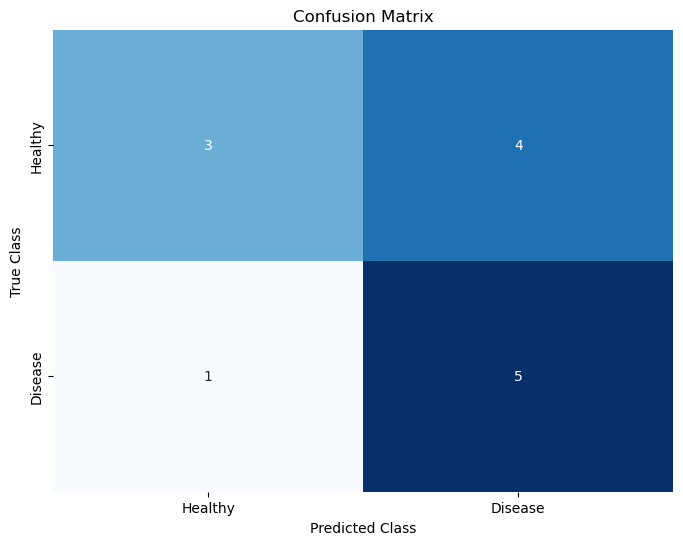


Fold 2
Accuracy for Fold 2: 0.7692
Confusion Matrix:
[[ 0  1]
 [ 2 10]]
              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00         1
     Disease       0.91      0.83      0.87        12

    accuracy                           0.77        13
   macro avg       0.45      0.42      0.43        13
weighted avg       0.84      0.77      0.80        13



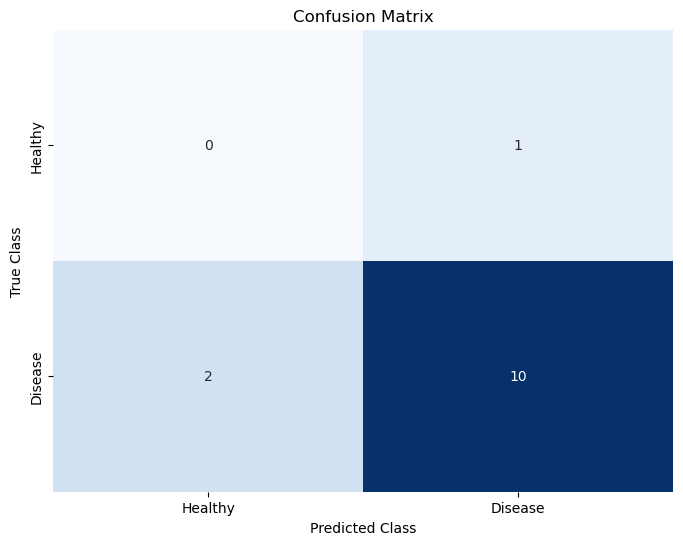


Fold 3
Accuracy for Fold 3: 0.9231
Confusion Matrix:
[[3 0]
 [1 9]]
              precision    recall  f1-score   support

     Healthy       0.75      1.00      0.86         3
     Disease       1.00      0.90      0.95        10

    accuracy                           0.92        13
   macro avg       0.88      0.95      0.90        13
weighted avg       0.94      0.92      0.93        13



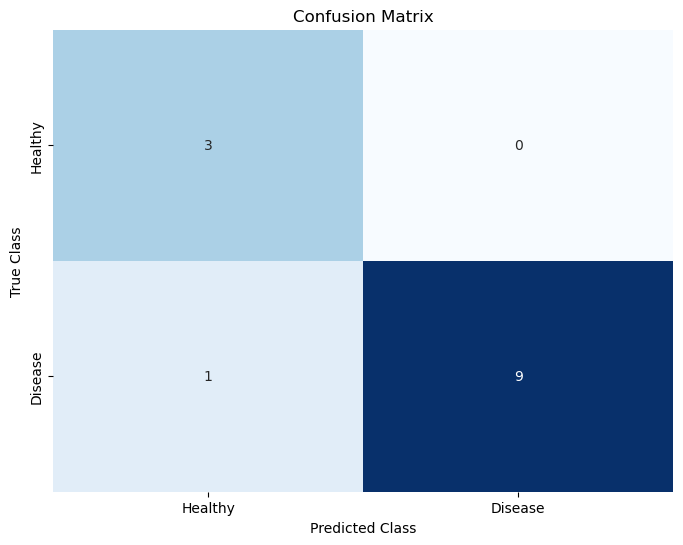


Average Accuracy for Training: 0.7692


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)
cross_val_decision_tree(X_train, y_train, depth=3)

50/50


Fold 1
Accuracy for Fold 1: 0.8182
Confusion Matrix:
[[ 6  2]
 [ 4 21]]
              precision    recall  f1-score   support

     Healthy       0.60      0.75      0.67         8
     Disease       0.91      0.84      0.87        25

    accuracy                           0.82        33
   macro avg       0.76      0.79      0.77        33
weighted avg       0.84      0.82      0.82        33



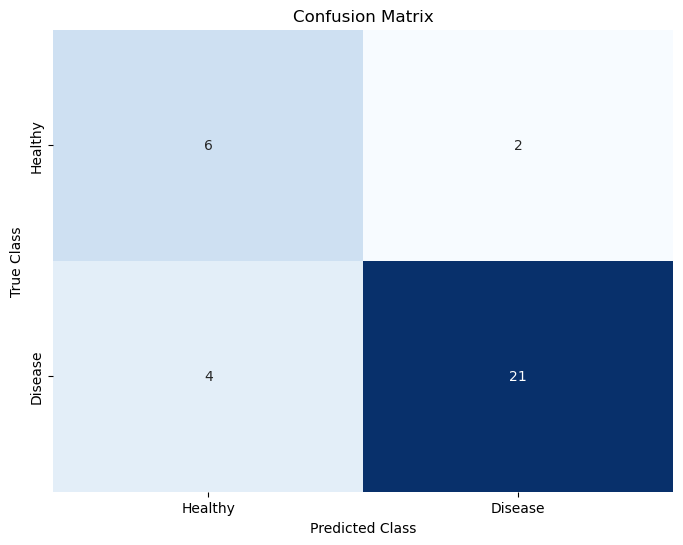


Fold 2
Accuracy for Fold 2: 0.9062
Confusion Matrix:
[[ 5  1]
 [ 2 24]]
              precision    recall  f1-score   support

     Healthy       0.71      0.83      0.77         6
     Disease       0.96      0.92      0.94        26

    accuracy                           0.91        32
   macro avg       0.84      0.88      0.86        32
weighted avg       0.91      0.91      0.91        32



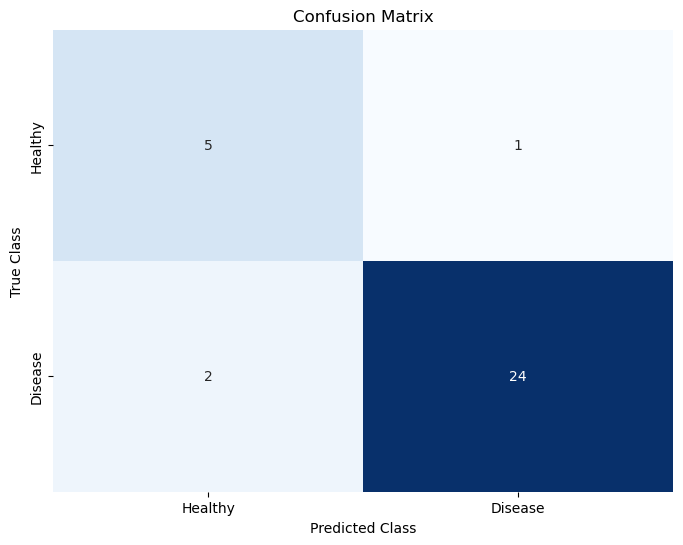


Fold 3
Accuracy for Fold 3: 0.7812
Confusion Matrix:
[[ 8  3]
 [ 4 17]]
              precision    recall  f1-score   support

     Healthy       0.67      0.73      0.70        11
     Disease       0.85      0.81      0.83        21

    accuracy                           0.78        32
   macro avg       0.76      0.77      0.76        32
weighted avg       0.79      0.78      0.78        32



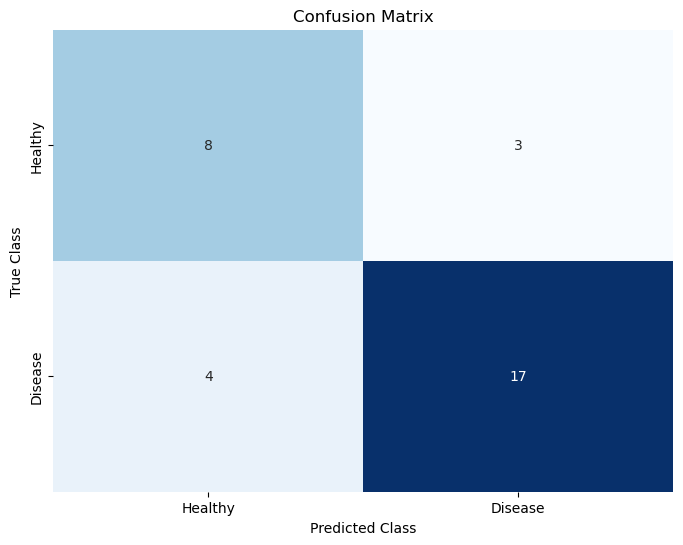


Average Accuracy for Training: 0.8352


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
cross_val_decision_tree(X_train, y_train, depth=4)

80/20


Fold 1
Accuracy for Fold 1: 0.8654
Confusion Matrix:
[[ 8  5]
 [ 2 37]]
              precision    recall  f1-score   support

     Healthy       0.80      0.62      0.70        13
     Disease       0.88      0.95      0.91        39

    accuracy                           0.87        52
   macro avg       0.84      0.78      0.80        52
weighted avg       0.86      0.87      0.86        52



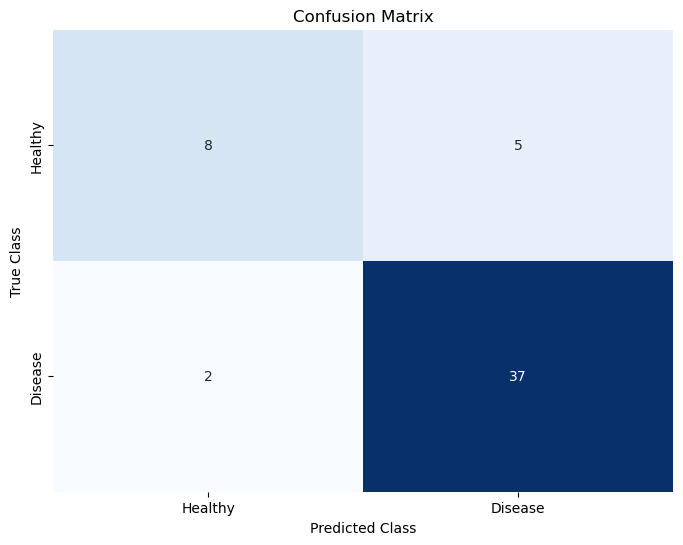


Fold 2
Accuracy for Fold 2: 0.8077
Confusion Matrix:
[[ 8  4]
 [ 6 34]]
              precision    recall  f1-score   support

     Healthy       0.57      0.67      0.62        12
     Disease       0.89      0.85      0.87        40

    accuracy                           0.81        52
   macro avg       0.73      0.76      0.74        52
weighted avg       0.82      0.81      0.81        52



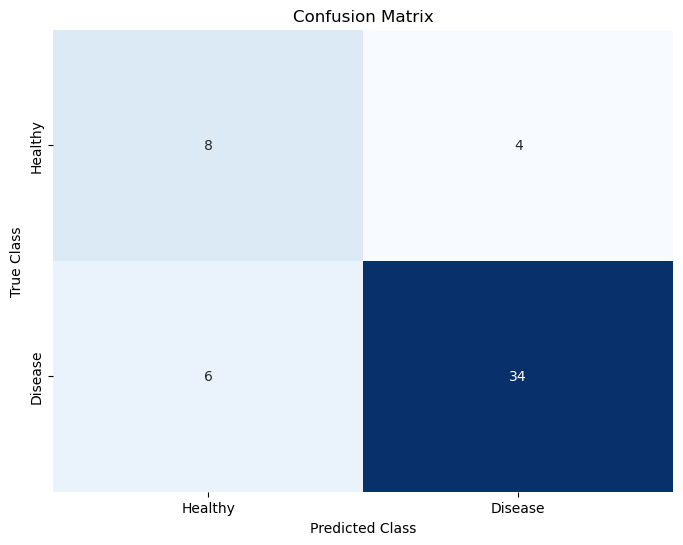


Fold 3
Accuracy for Fold 3: 0.8269
Confusion Matrix:
[[ 8  5]
 [ 4 35]]
              precision    recall  f1-score   support

     Healthy       0.67      0.62      0.64        13
     Disease       0.88      0.90      0.89        39

    accuracy                           0.83        52
   macro avg       0.77      0.76      0.76        52
weighted avg       0.82      0.83      0.82        52



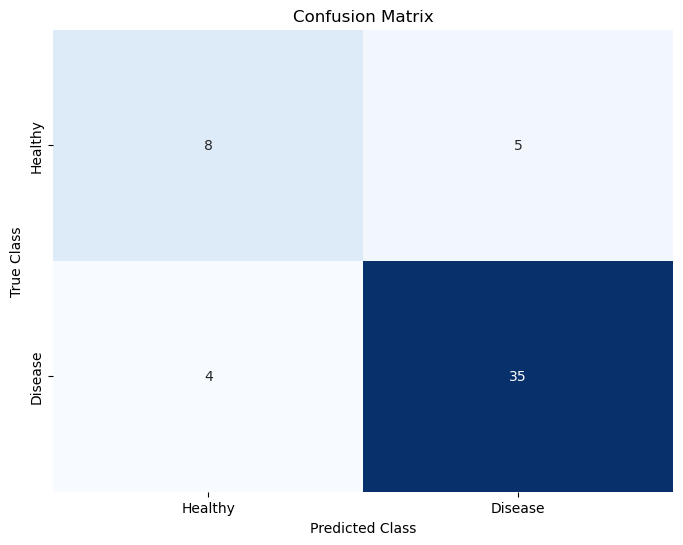


Average Accuracy for Training: 0.8333


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
cross_val_decision_tree(X_train, y_train, depth=5)

In [13]:
file_path = "breast+cancer/breast-cancer.data"
column_names = ['class', 'age', 'menopause', 'tumor size', 'inv nodes', 'node capes', 'deg malig', 'breast', 'breast quad', 'irradiat'] 
print(len(column_names))
breast_data =  pd.read_csv(file_path, delimiter=",", header=None, names=column_names)

class_map = {'no-recurrence-events': 0, 'recurrence-events' : 1} #0 is healthy

age_mapping = {
    '10-19': 15,
    '20-29': 25,
    '30-39': 35,
    '40-49': 45,
    '50-59': 55,
    '60-69': 65,
    '70-79': 75,
    '80-89': 85,
    '90-99': 95
}
meno_mapping = {
    'lt40' : 0,
    'ge40' : 1,
    'premeno' : 2
}
size_mapping = {
'0-4' : 2,
'5-9' : 7,
'10-14' : 12,
'15-19' : 17,
'20-24' : 22,
'25-29' : 27,
'30-34' : 32,
'35-39' : 37,
'40-44' : 42,
'45-49' : 47,
'50-54' : 52,
'55-59' : 57
}

node_mapping = {
'0-2' : 2,
'3-5' : 5,
'6-8' : 8,
'9-11' : 11,
'12-14' : 14,
'15-17' : 17,
'18-20' : 20,
'21-23' : 23,
'24-26' : 26,
'27-29' : 29,
'30-32' : 32,
'33-35' : 35,
'36-39' : 39
}
y_n_map = {'yes': 0, 'no':1}
side_map = {'left': 0, 'right':1}
quad_map = {
'left_up' : 0,
'left_low' : 1,
'right_up' : 2,
'right_low' : 3,
'central' : 4,
}
breast_data['class'] = breast_data['class'].replace(class_map)
breast_data['age'] = breast_data['age'].replace(age_mapping)
breast_data['menopause'] = breast_data['menopause'].replace(meno_mapping)
breast_data['tumor size'] = breast_data['tumor size'].replace(size_mapping)
breast_data['inv nodes'] = breast_data['inv nodes'].replace(node_mapping)
breast_data['node capes'] = breast_data['node capes'].replace(y_n_map)
breast_data['breast'] = breast_data['breast'].replace(side_map)
breast_data['breast quad'] = breast_data['breast quad'].replace(quad_map)
breast_data['irradiat'] = breast_data['irradiat'].replace(y_n_map)

breast_data['node capes'] = pd.to_numeric(breast_data['node capes'], errors='coerce')
breast_data['breast quad'] = pd.to_numeric(breast_data['breast quad'], errors='coerce')

breast_data.dropna(inplace=True) #Dropped 9 entries, as Nan
# breast_data.info()

shuffled_breast_data = breast_data.sample(frac=1)
shuffled_breast_data.reset_index(inplace = True, drop = True)

Class = ['class']
feat_list = list(breast_data.columns)
feat_list.remove('class')
Features = feat_list

X = shuffled_breast_data[Features].values
Y = shuffled_breast_data[Class].values

PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

10


/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_92949/1305872366.py:63: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_data['class'] = breast_data['class'].replace(class_map)
/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_92949/1305872366.py:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_data['age'] = breast_data['age'].replace(age_mapping)
/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_92949/1305872366.py:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will

20/80


Fold 1
Accuracy for Fold 1: 0.7368
Confusion Matrix:
[[11  1]
 [ 4  3]]
              precision    recall  f1-score   support

     Healthy       0.73      0.92      0.81        12
     Disease       0.75      0.43      0.55         7

    accuracy                           0.74        19
   macro avg       0.74      0.67      0.68        19
weighted avg       0.74      0.74      0.72        19



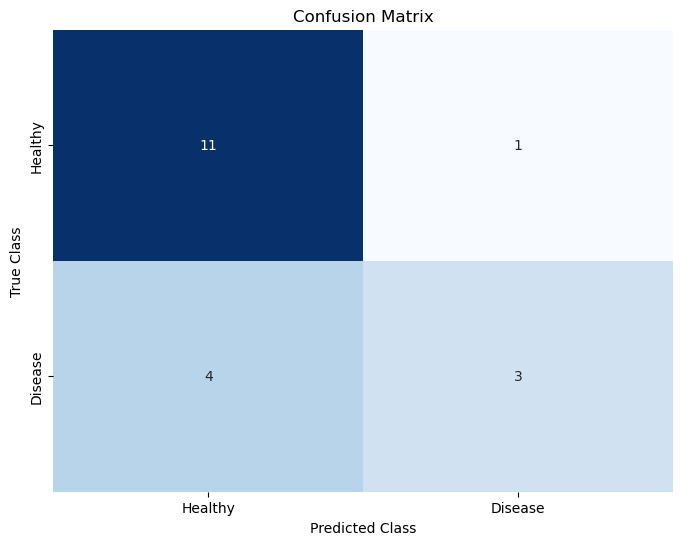


Fold 2
Accuracy for Fold 2: 0.5556
Confusion Matrix:
[[8 2]
 [6 2]]
              precision    recall  f1-score   support

     Healthy       0.57      0.80      0.67        10
     Disease       0.50      0.25      0.33         8

    accuracy                           0.56        18
   macro avg       0.54      0.53      0.50        18
weighted avg       0.54      0.56      0.52        18



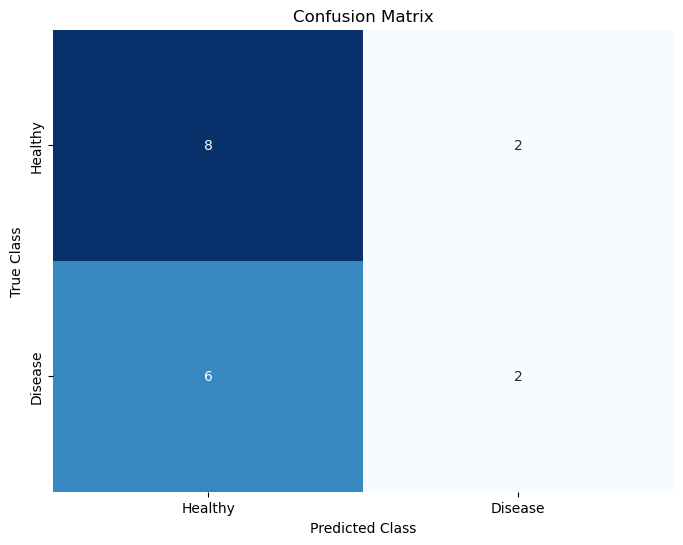


Fold 3
Accuracy for Fold 3: 0.5556
Confusion Matrix:
[[7 7]
 [1 3]]
              precision    recall  f1-score   support

     Healthy       0.88      0.50      0.64        14
     Disease       0.30      0.75      0.43         4

    accuracy                           0.56        18
   macro avg       0.59      0.62      0.53        18
weighted avg       0.75      0.56      0.59        18



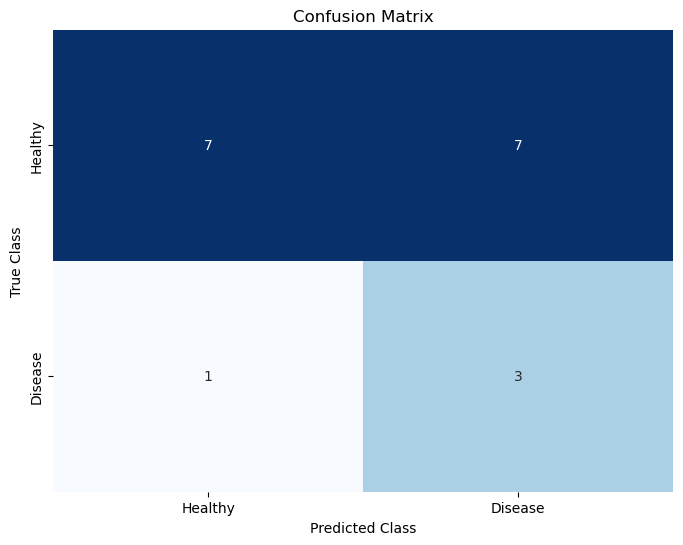


Average Accuracy for Training: 0.6160


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)
cross_val_decision_tree(X_train, y_train, depth=3)

50/50


Fold 1
Accuracy for Fold 1: 0.7174
Confusion Matrix:
[[30  4]
 [ 9  3]]
              precision    recall  f1-score   support

     Healthy       0.77      0.88      0.82        34
     Disease       0.43      0.25      0.32        12

    accuracy                           0.72        46
   macro avg       0.60      0.57      0.57        46
weighted avg       0.68      0.72      0.69        46



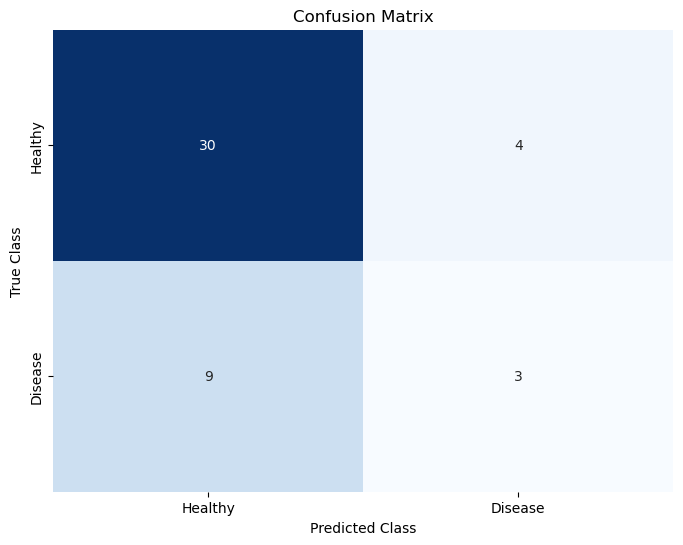


Fold 2
Accuracy for Fold 2: 0.7174
Confusion Matrix:
[[29  3]
 [10  4]]
              precision    recall  f1-score   support

     Healthy       0.74      0.91      0.82        32
     Disease       0.57      0.29      0.38        14

    accuracy                           0.72        46
   macro avg       0.66      0.60      0.60        46
weighted avg       0.69      0.72      0.68        46



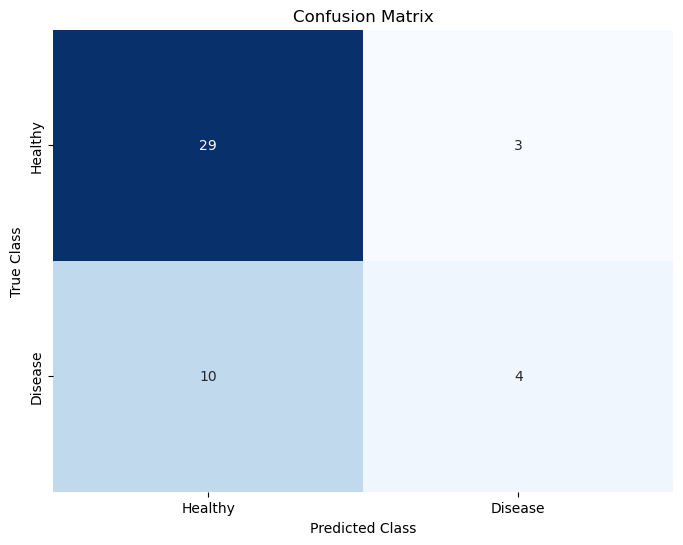


Fold 3
Accuracy for Fold 3: 0.6522
Confusion Matrix:
[[22  9]
 [ 7  8]]
              precision    recall  f1-score   support

     Healthy       0.76      0.71      0.73        31
     Disease       0.47      0.53      0.50        15

    accuracy                           0.65        46
   macro avg       0.61      0.62      0.62        46
weighted avg       0.66      0.65      0.66        46



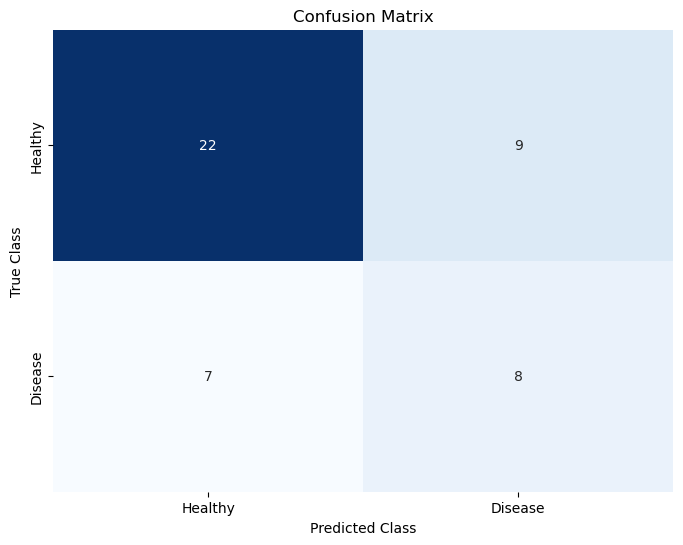


Average Accuracy for Training: 0.6957


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
cross_val_decision_tree(X_train, y_train, depth=5)

80/20


Fold 1
Accuracy for Fold 1: 0.7568
Confusion Matrix:
[[39 10]
 [ 8 17]]
              precision    recall  f1-score   support

     Healthy       0.83      0.80      0.81        49
     Disease       0.63      0.68      0.65        25

    accuracy                           0.76        74
   macro avg       0.73      0.74      0.73        74
weighted avg       0.76      0.76      0.76        74



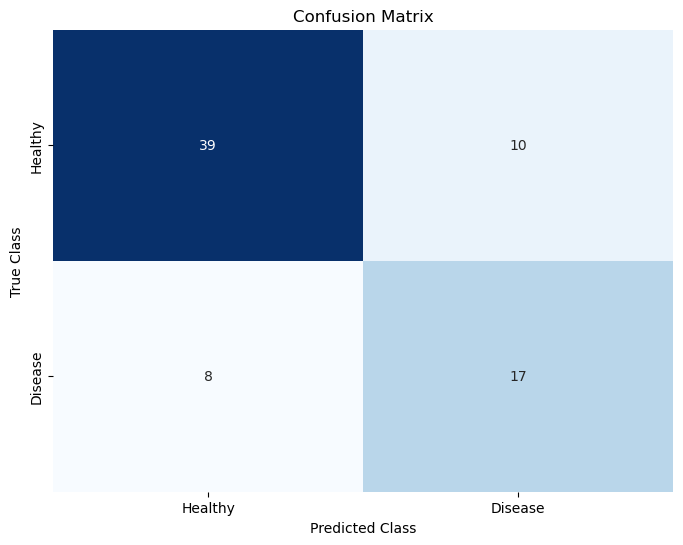


Fold 2
Accuracy for Fold 2: 0.6892
Confusion Matrix:
[[42  8]
 [15  9]]
              precision    recall  f1-score   support

     Healthy       0.74      0.84      0.79        50
     Disease       0.53      0.38      0.44        24

    accuracy                           0.69        74
   macro avg       0.63      0.61      0.61        74
weighted avg       0.67      0.69      0.67        74



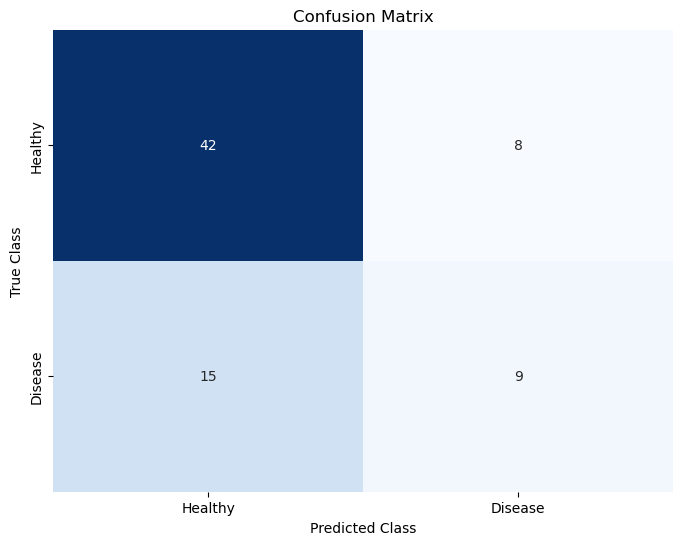


Fold 3
Accuracy for Fold 3: 0.7260
Confusion Matrix:
[[49  5]
 [15  4]]
              precision    recall  f1-score   support

     Healthy       0.77      0.91      0.83        54
     Disease       0.44      0.21      0.29        19

    accuracy                           0.73        73
   macro avg       0.61      0.56      0.56        73
weighted avg       0.68      0.73      0.69        73



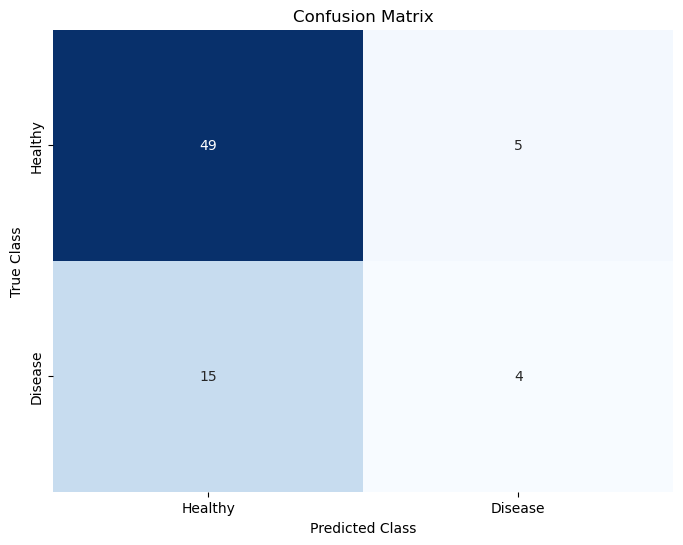


Average Accuracy for Training: 0.7240


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
cross_val_decision_tree(X_train, y_train, depth=3)